In [75]:
import pandas as pd 
import numpy as np
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [76]:
df = pd.read_csv('datasets/titanic-training-data.csv')

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
df.shape


(891, 12)

In [81]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [82]:
# Replace missing values in numerical columns using median
median_age = df['Age'].median()
df['Age'] = df['Age'].replace(np.nan,median_age)

In [83]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
# replace missing values in categorical columns using mode
mode1 = df['Embarked'].mode()[0]
mode1

'S'

In [85]:
df['Embarked'] = df['Embarked'].replace(np.nan, mode1)

In [86]:
# drop cabin
df = df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)


In [87]:
duplicate =df.duplicated()
print(duplicate.sum())

116


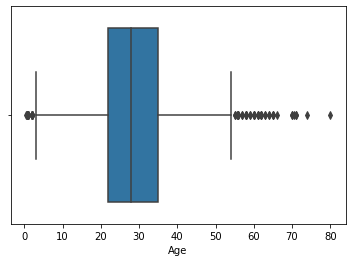

In [88]:
# boxplot
sns.boxplot(df['Age'])
plt.show()

In [89]:
# function to remove outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 -Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [90]:
low_age, upper_age = remove_outlier(df['Age'])
df['Age'] = np.where(df['Age']>upper_age,upper_age,df['Age'])
df['Age'] = np.where(df['Age']<low_age,low_age,df['Age'])

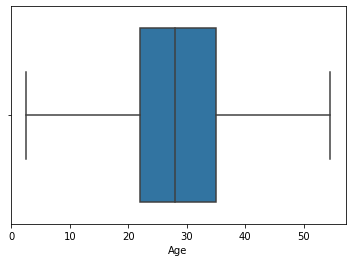

In [91]:
# boxplot
sns.boxplot(df['Age'])
plt.show()

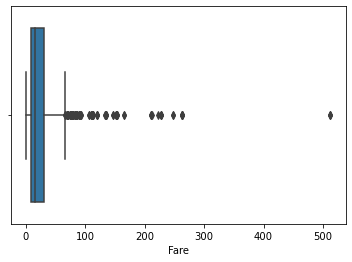

In [92]:
# boxplot
sns.boxplot(df['Fare'])
plt.show()

In [93]:
low_age, upper_age = remove_outlier(df['Fare'])
df['Fare'] = np.where(df['Fare']>upper_age,upper_age,df['Fare'])
df['Fare'] = np.where(df['Fare']<low_age,low_age,df['Fare'])

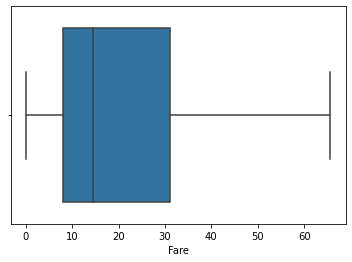

In [94]:
# boxplot
sns.boxplot(df['Fare'])
plt.show()

#### Encoding

In [96]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [97]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [98]:
df = pd.get_dummies(df, columns=['Sex','Embarked'])

In [99]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,65.6344,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Dataset -2 (Pima diabetes dataset)

In [101]:
df2 = pd.read_csv('datasets/pima-indians-diabetes-2.csv')

In [102]:
df2.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [103]:
df2.shape

(768, 9)

In [105]:
df2.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [104]:
df2.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [106]:
df2.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [109]:
duplicate = df2.duplicated()
print(duplicate.sum())

0


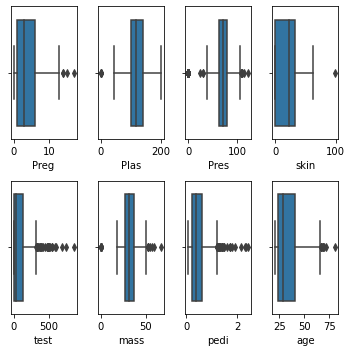

In [114]:
# check outliers columns
fig,ax = plt.subplots(2,4,figsize=(5,5))

sns.boxplot(df2['Preg'],ax=ax[0,0])
sns.boxplot(df2['Plas'],ax=ax[0,1])
sns.boxplot(df2['Pres'],ax=ax[0,2])
sns.boxplot(df2['skin'],ax=ax[0,3])
sns.boxplot(df2['test'],ax=ax[1,0])
sns.boxplot(df2['mass'],ax=ax[1,1])
sns.boxplot(df2['pedi'],ax=ax[1,2])
sns.boxplot(df2['age'],ax=ax[1,3])
plt.tight_layout()
plt.show()

In [110]:
# remove outlier function
def remove_outliers(col):
    Q1,Q3 =col.quantile([0.25,0.75])
    iqr = Q3-Q1
    lower_range = Q1-(1.5*iqr)
    upper_range = Q3 + (1.5*iqr)
    return lower_range,upper_range

In [116]:
# remove outlier in age columns
lowAge,uppAge = remove_outliers(df2['age'])
df2['age'] =np.where(df2['age']<lowAge,lowAge,df2['age'])
df2['age'] =np.where(df2['age']>uppAge,uppAge,df2['age'])


In [122]:
# remove outlier in Preg columns
lowPreg,uppPreg = remove_outliers(df2['Preg'])
df2['Preg'] =np.where(df2['Preg']<lowPreg,lowPreg,df2['Preg'])
df2['Preg'] =np.where(df2['Preg']>uppPreg,uppPreg,df2['Preg'])

In [123]:
# remove outlier in Plas columns
lowPlas,uppPlas = remove_outliers(df2['Plas'])
df2['Plas'] =np.where(df2['Plas']<lowPlas,lowPlas,df2['Plas'])
df2['Plas'] =np.where(df2['Plas']>uppPlas,uppPlas,df2['Plas'])

In [124]:
# remove outlier in mass columns
lowMass,uppMass = remove_outliers(df2['mass'])
df2['mass'] =np.where(df2['mass']<lowMass,lowMass,df2['mass'])
df2['mass'] =np.where(df2['mass']>uppMass,uppMass,df2['mass'])

In [125]:
# remove outlier in pedi columns
lowPed,uppPed = remove_outliers(df2['pedi'])
df2['pedi'] =np.where(df2['pedi']<lowPed,lowPed,df2['pedi'])
df2['pedi'] =np.where(df2['pedi']>uppPed,uppPed,df2['pedi'])

In [127]:
# remove outlier in test columns
lowTest,uppTest = remove_outliers(df2['test'])
df2['test'] =np.where(df2['test']<lowTest,lowTest,df2['test'])
df2['test'] =np.where(df2['test']>uppTest,uppTest,df2['test'])

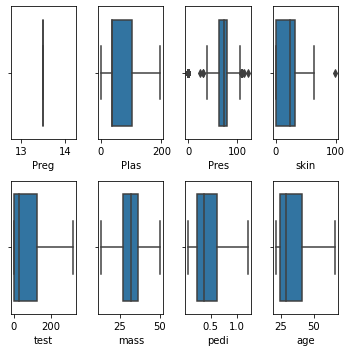

In [128]:
# check outliers columns
fig,ax = plt.subplots(2,4,figsize=(5,5))

sns.boxplot(df2['Preg'],ax=ax[0,0])
sns.boxplot(df2['Plas'],ax=ax[0,1])
sns.boxplot(df2['Pres'],ax=ax[0,2])
sns.boxplot(df2['skin'],ax=ax[0,3])
sns.boxplot(df2['test'],ax=ax[1,0])
sns.boxplot(df2['mass'],ax=ax[1,1])
sns.boxplot(df2['pedi'],ax=ax[1,2])
sns.boxplot(df2['age'],ax=ax[1,3])
plt.tight_layout()
plt.show()

In [ ]:
lowTest,uppTest = remove_outliers(df2['test'])
df2['test'] =np.where(df2['test']<lowTest,lowTest,df2['test'])
df2['test'] =np.where(df2['test']>uppTest,uppTest,df2['test'])

In [133]:
# remove outlier function
def remove_outliers(data):
    for col in data.columns:
        
        Q1,Q3 =data[col].quantile([0.25,0.75])
        iqr = Q3-Q1
        lower_range = Q1-(1.5*iqr)
        upper_range = Q3 + (1.5*iqr)
        data[col] = np.where(data[col]<lower_range,lower_range,data[col])
        data[col] = np.where(data[col]>upper_range,upper_range,data[col])
        
    return data

### Auto Cars dataset

In [141]:
df3 = pd.read_csv('datasets/auto-mpg.csv')
df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [142]:
df3.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [146]:
df3.shape

(398, 9)